In [79]:
from IPython.core.interactiveshell import InteractiveShell
from pprint import pprint
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2023-05-21 17:56:02 +07:00)


In [80]:
train_ds = pd.read_csv("./train_ds_process.csv")
test_ds = pd.read_csv("./test_ds_process.csv")

time: 47 ms (started: 2023-05-21 17:56:02 +07:00)


In [81]:
X_train = train_ds.drop(["Giá tiền (VNĐ)"], axis=1)
y_train = train_ds["Giá tiền (VNĐ)"]
X_test = test_ds.drop("Giá tiền (VNĐ)", axis=1)
y_test = test_ds["Giá tiền (VNĐ)"]


time: 0 ns (started: 2023-05-21 17:56:02 +07:00)


In [82]:
from sklearn import metrics


time: 0 ns (started: 2023-05-21 17:56:02 +07:00)


In [83]:
def metric_for_evalue_model(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_absolute_percentage_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"MAE = {mae}")
    print(f"MSE = {mse}")
    print(f"R2 = {r2}")
    print(f"RMSE = {rmse}")

time: 0 ns (started: 2023-05-21 17:56:02 +07:00)


In [84]:
def plot_residuals(y_test, y_pred):
    indexes = list(range(1, 150+1))[:150]
    fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
    axs.plot(indexes, y_pred[:150], label='predicted_value', color='purple')
    axs.plot(indexes, y_test[:150], label='actual_value', color='orange')
    axs.legend()
    axs.set_ylabel('Price')
    fig.suptitle('Predicted Price VS Actual Price')
    plt.show()

time: 15 ms (started: 2023-05-21 17:56:02 +07:00)


Random Forest Regressor


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

RandomForestRegressor()

MAE = 2252155.4406945785
MSE = 0.20532881934680808
R2 = 0.8294234805585414
RMSE = 0.45313223163532307
time: 2.83 s (started: 2023-05-21 17:56:02 +07:00)


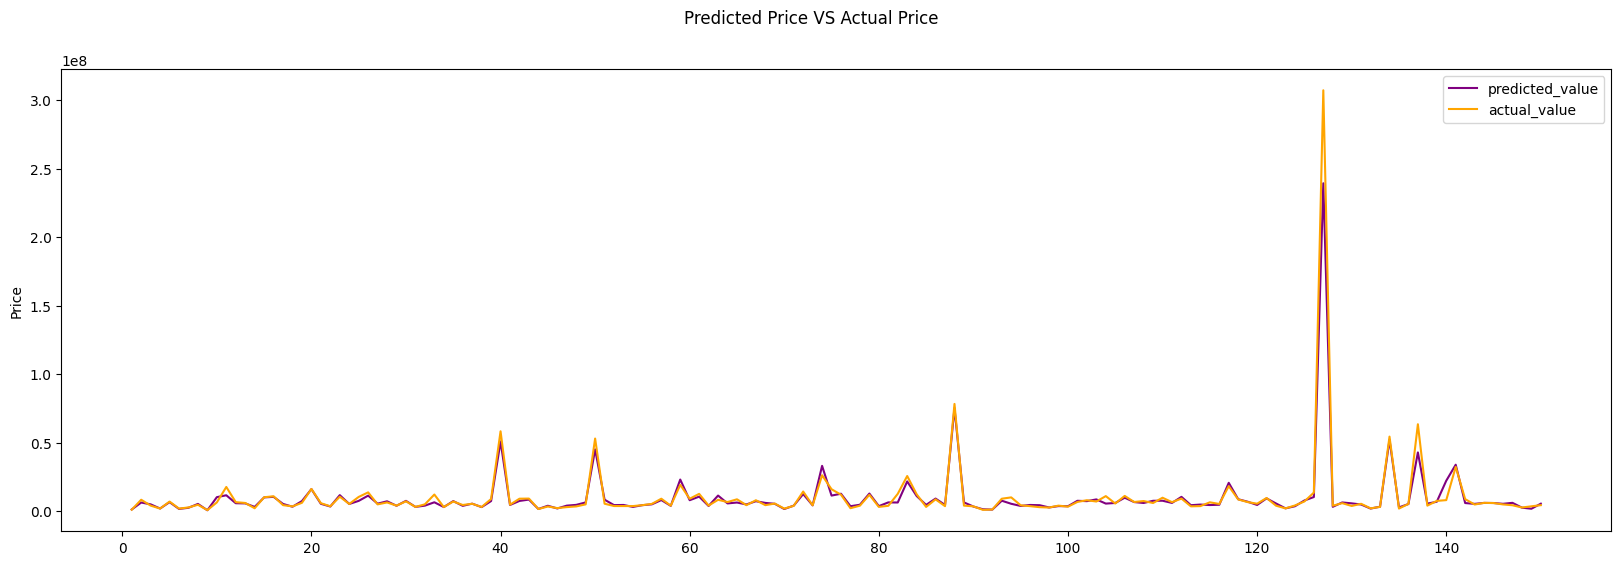

time: 250 ms (started: 2023-05-21 17:56:05 +07:00)


In [86]:
plot_residuals(y_test, y_pred)

In [89]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_pars = grid_search.best_params_

print('Best hyperparameters: ', best_pars)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

Best hyperparameters:  {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
time: 3min 3s (started: 2023-05-21 17:59:57 +07:00)


RandomForestRegressor(max_depth=9, max_features='auto', min_samples_split=10,
                      random_state=0)

MAE = 3063298.5672481614
MSE = 0.3194423957774765
R2 = 0.7531281988164492
RMSE = 0.5651923529007417


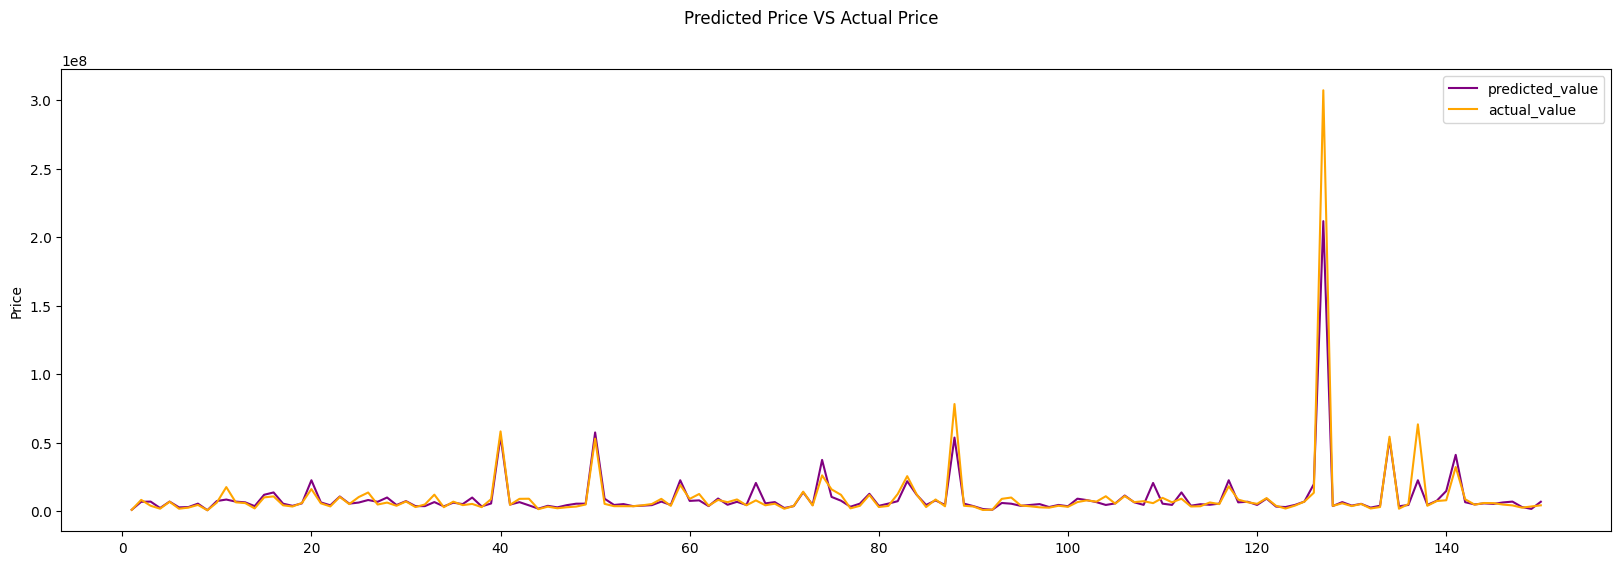

time: 1.94 s (started: 2023-05-21 18:03:21 +07:00)


In [90]:
rf = RandomForestRegressor(random_state=0, max_depth=best_pars['max_depth'], min_samples_split=best_pars[
                           'min_samples_split'], min_samples_leaf=best_pars['min_samples_leaf'], max_features=best_pars['max_features'])

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)

Logistic Regression

LogisticRegression()

MAE = 5252629.981916817
MSE = 0.40413843616869677
R2 = 0.3270127844707764
RMSE = 0.6357188342095087


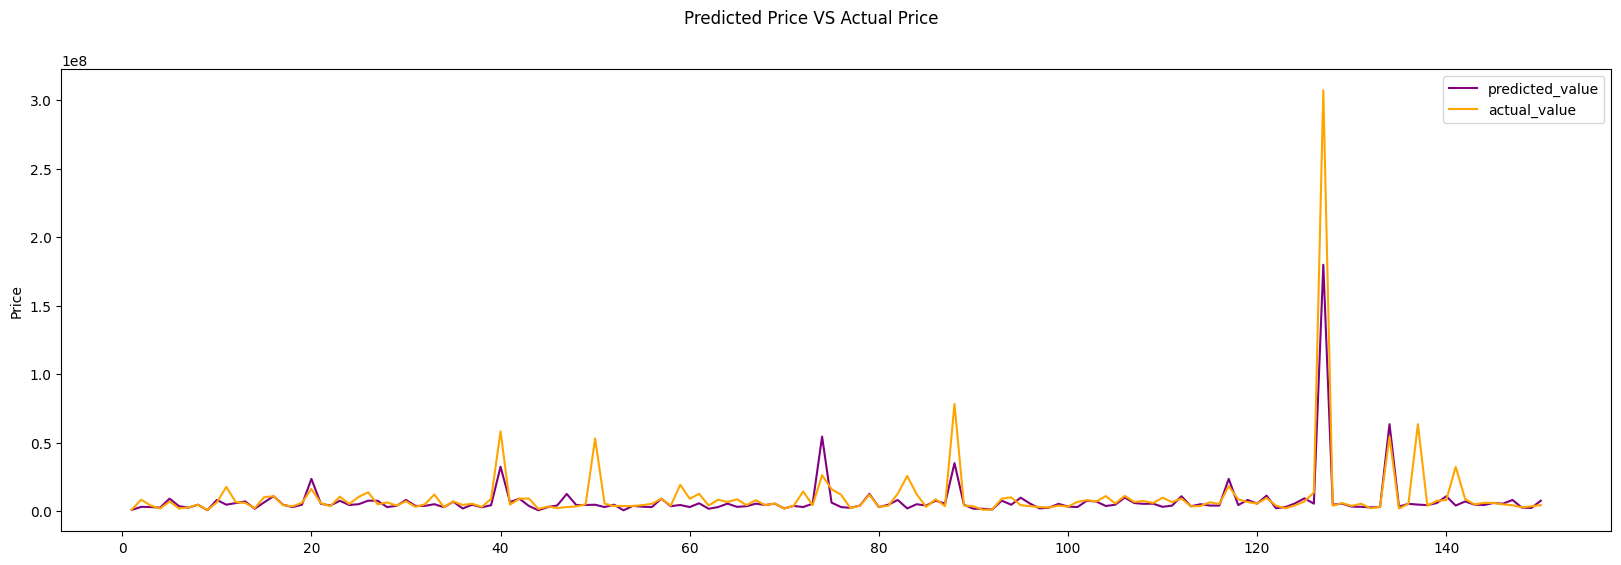

time: 1min 57s (started: 2023-05-21 17:46:50 +07:00)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression()

logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)

In [ ]:
params = {"penalty": ["l1", "l2", "none"], "C": [0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(logistic, params)
clf.fit(X_train, y_train)

# clf.best_params_

c = 0.01
penalty = 'None'

In [ ]:

#Tìm bộ tham số tối ưu
logistic = LogisticRegression()
params = {"penalty": ["l1", "l2", "none"], "C": [0.01, 0.1, 1, 10, 100]}
# Sử dụng kỹ thuật 5-fold cross-validation để lựa chọn bộ siêu tham số tối ưu
clf = GridSearchCV(logistic, params)
clf.fit(X_train, y_train)
# In ra bộ siêu tham số tối ưu
clf.best_params_

best_penalty = clf.best_params_['penalty']
best_C = clf.best_params_['C']
logistic = LogisticRegression(penalty=best_penalty,C=best_C)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
# Đánh giá hiệu suất của mô hình bằng mean squared error (MSE)
mae = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mae/1000000)

NameError: name 'df_watch' is not defined

time: 31 ms (started: 2023-05-21 17:48:47 +07:00)
